In [6]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


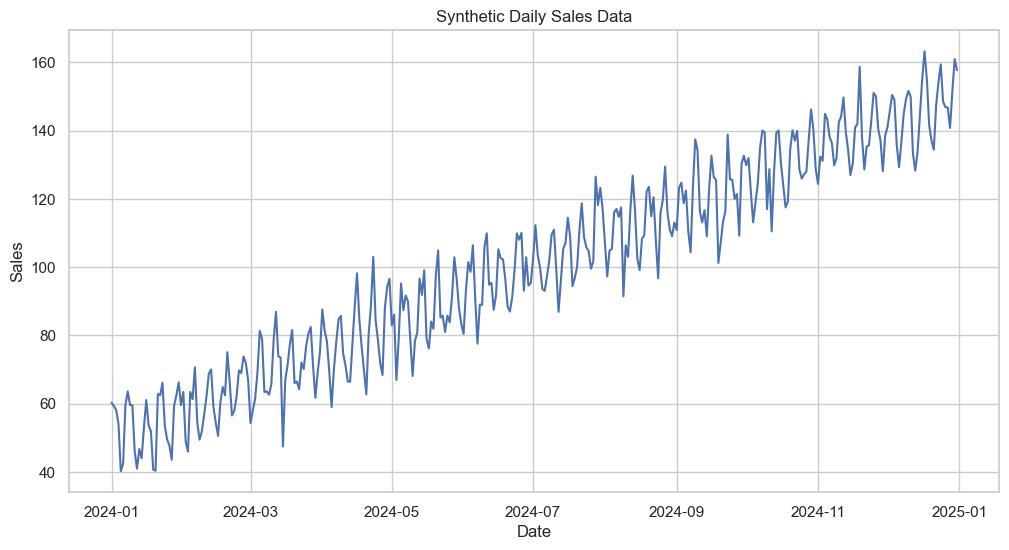

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Generate a date range for one year
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
n = len(date_range)

# Create components of the synthetic sales data
np.random.seed(42)  # For reproducibility
trend = np.linspace(50, 150, n)  # Linear trend from 50 to 150
seasonality = 10 * np.sin(2 * np.pi * date_range.dayofyear / 7)  # Weekly seasonality
noise = np.random.normal(0, 5, n)  # Random noise

# Combine components to create sales data
sales = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales})
df.set_index('Date', inplace=True)

# Plot the synthetic sales data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Sales')
plt.title('Synthetic Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [12]:
# Create lag features
df['Lag_1'] = df['Sales'].shift(1)
df['Lag_2'] = df['Sales'].shift(2)

# Extract time-based features
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

# Drop rows with NaN values resulting from lag features
df.dropna(inplace=True)

# Define features and target
features = ['Lag_1', 'Lag_2', 'DayOfWeek', 'Month']
X = df[features]
y = df['Sales']


In [14]:
from sklearn.model_selection import train_test_split

# Split the data without shuffling to maintain the time series order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 244.89
Mean Absolute Error: 14.06
R-squared: -1.80


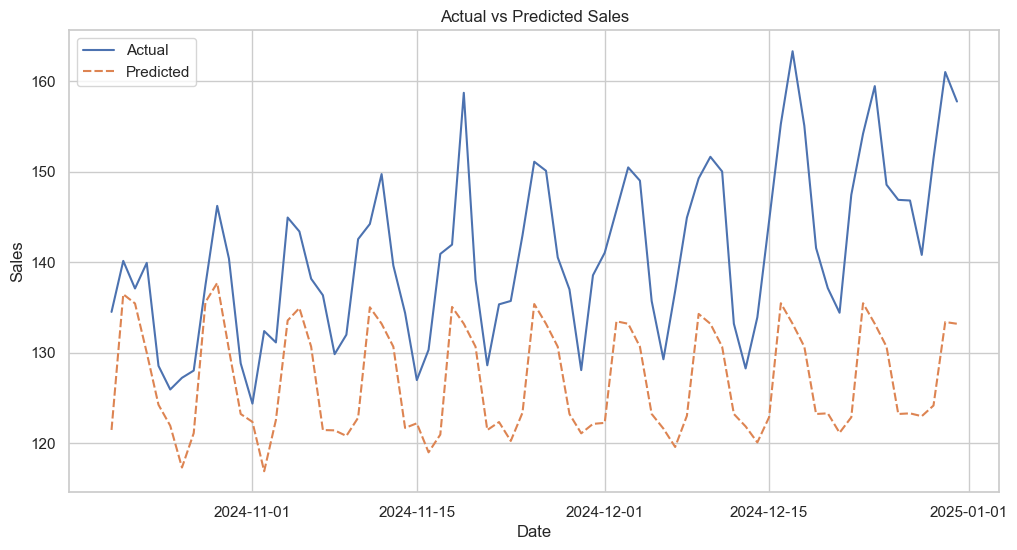

In [20]:
# Create a DataFrame for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [22]:
import joblib

# Save the model to a file
joblib.dump(model, 'sales_forecasting_model.pkl')


['sales_forecasting_model.pkl']